In [ ]:
'''

Quantum Phase Estimation

Por Samuraí Brito

Data:02072021


'''

In [21]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q-research', group='inter-inst-phys-1', project='main')

# Quantum Fourier transform
Using Available libraries

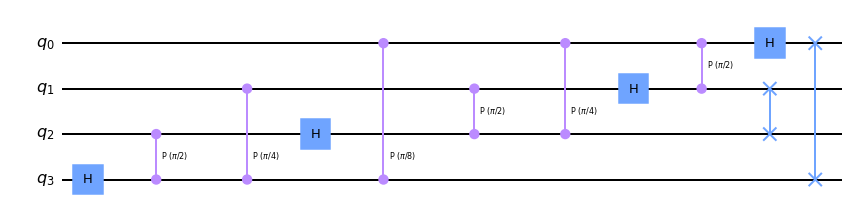

In [22]:
from qiskit.circuit.library import QFT

n = 4
qft = QFT(num_qubits = n, name = 'QFT')
qft.draw('mpl')

Testing input fixed value (101), check the output state

In [23]:
#Creating 101 state
qft_circ = QuantumCircuit(n,n)
qft_circ.x(0)
qft_circ.x(2)
qft_circ.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
c: 4/═════

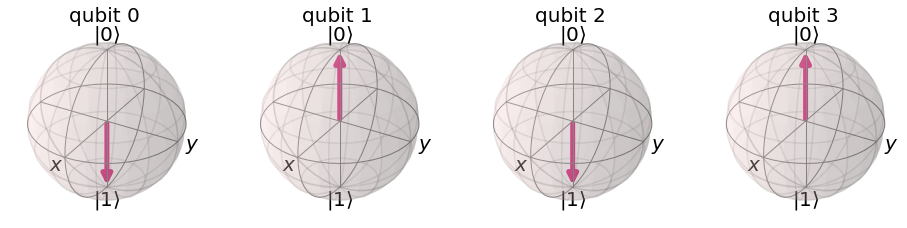

In [24]:
sim_backend = Aer.get_backend('statevector_simulator')
state = execute(qft_circ, sim_backend).result().get_statevector()
# #get results

# results = job.result()
# state = results.get_statevector()

plot_bloch_multivector(state)

In [25]:
#appending QFT subroutine
qft_circ.append(qft,range(n))
qft_circ.save_statevector()
qft_circ.draw()

┌───┐┌──────┐ ░ 
q_0: ┤ X ├┤0     ├─░─
     └───┘│      │ ░ 
q_1: ─────┤1     ├─░─
     ┌───┐│  QFT │ ░ 
q_2: ┤ X ├┤2     ├─░─
     └───┘│      │ ░ 
q_3: ─────┤3     ├─░─
          └──────┘ ░ 
c: 4/════════════════

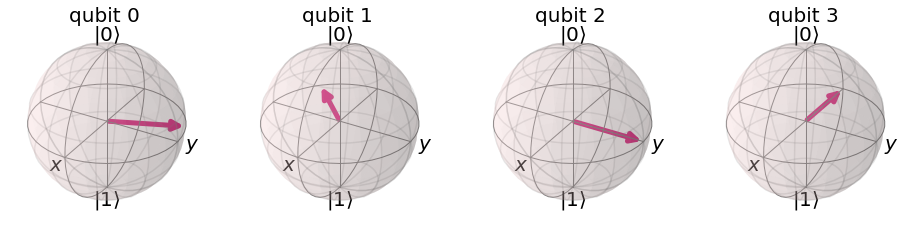

In [26]:
#Run in a simulator
sim_backend = Aer.get_backend('statevector_simulator')
state = execute(qft_circ, sim_backend).result().get_statevector()

plot_bloch_multivector(state)

Inverse quantum fourier transform

In [27]:
iqft = QFT(n, inverse=True, name = 'iQFT')
iqft.draw()

┌───┐                                                            »
q_0: ────X─┤ H ├─■──────────────■───────────────────■───────────────────────»
         │ └───┘ │P(-π/2) ┌───┐ │                   │                       »
q_1: ─X──┼───────■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      │  │                └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
q_2: ─X──┼──────────────────────■─────────■─────────┼────────┤ H ├─┼────────»
         │                                          │P(-π/8) └───┘ │P(-π/4) »
q_3: ────X──────────────────────────────────────────■──────────────■────────»
                                                                            »
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«                    
«q_2: ─■─────────────
«      │P(-π/2) ┌───┐
«q_3: ─■────────┤ H ├
«               └───┘

In [28]:
#apply inverse QFT
qft_circ.append(iqft, range(n))
qft_circ.measure(range(n), range(n))
qft_circ.draw()

┌───┐┌──────┐ ░ ┌───────┐┌─┐         
q_0: ┤ X ├┤0     ├─░─┤0      ├┤M├─────────
     └───┘│      │ ░ │       │└╥┘┌─┐      
q_1: ─────┤1     ├─░─┤1      ├─╫─┤M├──────
     ┌───┐│  QFT │ ░ │  iQFT │ ║ └╥┘┌─┐   
q_2: ┤ X ├┤2     ├─░─┤2      ├─╫──╫─┤M├───
     └───┘│      │ ░ │       │ ║  ║ └╥┘┌─┐
q_3: ─────┤3     ├─░─┤3      ├─╫──╫──╫─┤M├
          └──────┘ ░ └───────┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════╩══╩══╩══╩═
                               0  1  2  3

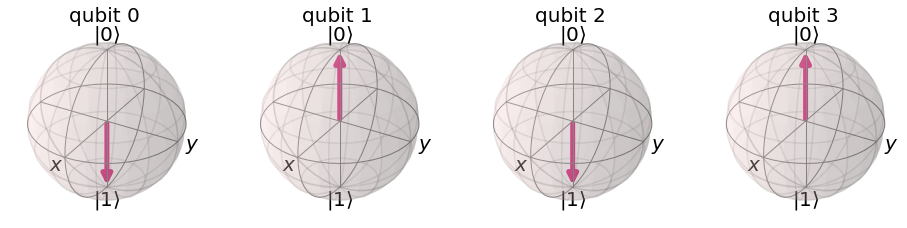

In [12]:
sim_backend = Aer.get_backend('statevector_simulator')
state = execute(qft_circ, sim_backend, shots = 10000000).result().get_statevector()

plot_bloch_multivector(state)

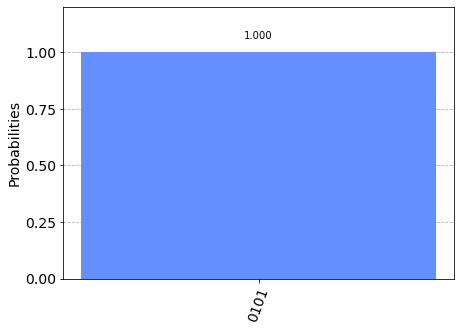

In [29]:
sim_backend = Aer.get_backend('qasm_simulator')
state = execute(qft_circ, sim_backend).result().get_counts()

plot_histogram(state)

# Phase Estimation (eingenvalue problem)

**Problem**: Find $\theta$ in



$U \vert \psi \rangle = e^{2\pi i \theta} \vert \psi \rangle$


where

$U$ is a unitary operator and $\vert \psi \rangle$ is a quantum state (eigenvector of $U$) associated to the eigenvalue $e^{2\pi i \theta}$

# Quantum Phase Estimation - step by step



Step 1: Def functions

Step 2: Define $\vert \psi\rangle$

Step 3: Phase estimator

Step 4: Inverse QFT

Step 5: Measure

### Defining QFT

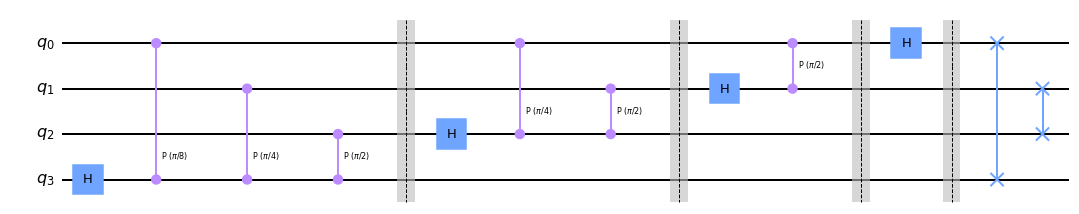

In [36]:
def qft(qc,n):
    for i in range(n):
        qc.h(n-i-1)
    #     qc.barrier()
    #     display(qc.draw('mpl'))
        for j in range(n-i-1):
            qc.cp(np.pi/(2**(n-i-j-1)), n-i-1,j)
        qc.barrier()
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    return qc
#     display(qc.draw('mpl'))

n = 4
qc = QuantumCircuit(n)
qc = qft(qc,n)
qc.draw('mpl')

### Defining Inverse QFT

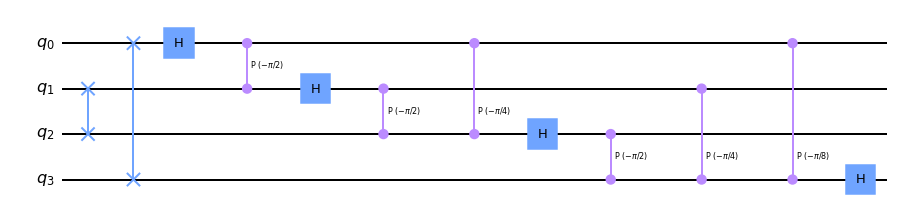

In [35]:
qc = QuantumCircuit(n)
def inverse_qft(qc, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    qc.append(invqft_circ, qc.qubits[:n])
    return qc
n = 4
qc = QuantumCircuit(n)
qc = inverse_qft(qc,n).decompose()
qc.draw('mpl')

### Phase estimator operator

Expected phase: 0.15


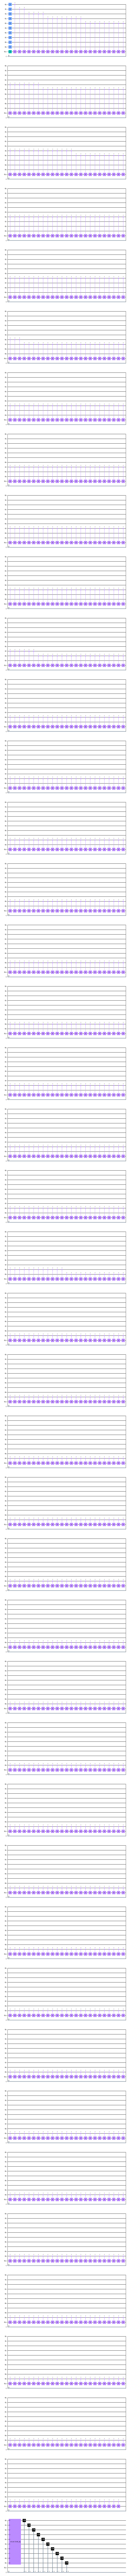

The phase is between: 0.150390625 0.1494140625
Integer number: [154, 153]


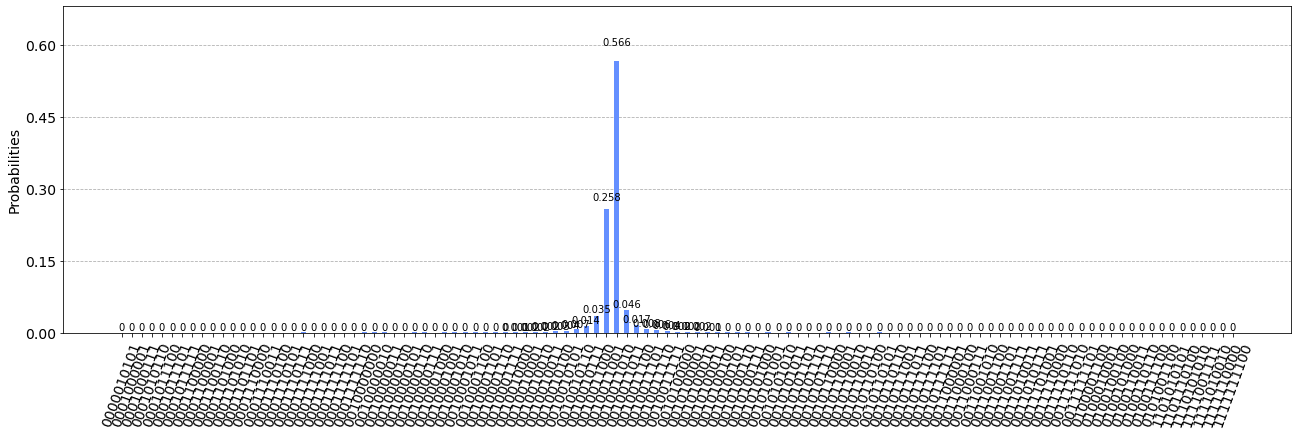

In [44]:
import numpy as np
from qiskit.extensions import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import numpy as np
import random 
from scipy.linalg import expm
from qiskit.circuit.add_control import add_control
n = 10

Id = np.eye(2) 

theta = 0.15

U = expm(2*1j*np.pi*theta*Id)
u = UnitaryGate(U,label='U')
u = add_control(operation=u, num_ctrl_qubits=1,ctrl_state=1, label = 'U')


print('Expected phase:', theta)

def qpe(n, u):
    qc = QuantumCircuit(n + 1,n)
    for i in range(n):
        qc.h(i)
    qc.x(n)
    for i in range(n):
        for j in range(2**i):
            qc.append(u, [i, n])
    qc.draw()
    
    #------------------- QFT dag ----------------------
    qft_circ = qft(QuantumCircuit(n), n)
    invqft_circ = qft_circ.inverse()
    qc.append(invqft_circ, qc.qubits[:n])
    qc.measure(range(n),range(n))
    return qc

qc = qpe(n,u)
display(qc.draw('mpl'))

shots = 10000
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=shots).result().get_counts()

states = sorted([[result[i]/shots, i] for i in result], reverse=True)
res = [int(i[1],2) for i in states]
if len(res) > 1 and states[1][0] > 0.1:
    print('The phase is between:', res[0]/2**n, res[1]/2**n)
else:
    print('The phase is:', res[0]/2**n)


print('Integer number:', res[:2])
plot_histogram(result, figsize = (22,6))

# for i in range(n):
#     qc.cp()